## Education & Career Success



Kaggle üzerinden aldığım bu veri setinde EDA-Feature Engineering işlemlerini tamamladıktan sonra bir regresyon modeli oluşturmaya çalışacağım.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("education_career_success.csv")

In [12]:
data.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S001,22,Male,3.8,1450,3.6,Computer Science,3,7,2,8,7,3,85000,8,2,Mid,7,No
1,S002,24,Female,3.6,1380,3.4,Business,2,5,3,7,6,2,65000,7,3,Mid,6,No
2,S003,21,Male,3.9,1520,3.8,Engineering,4,9,4,9,8,4,120000,9,1,Senior,6,No
3,S004,23,Female,3.5,1300,3.2,Psychology,1,3,1,6,5,1,48000,6,4,Entry,8,No
4,S005,25,Male,3.7,1420,3.5,Medicine,2,6,2,8,7,3,95000,8,2,Mid,5,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             400 non-null    object 
 1   Age                    400 non-null    int64  
 2   Gender                 400 non-null    object 
 3   High_School_GPA        400 non-null    float64
 4   SAT_Score              400 non-null    int64  
 5   University_GPA         400 non-null    float64
 6   Field_of_Study         400 non-null    object 
 7   Internships_Completed  400 non-null    int64  
 8   Projects_Completed     400 non-null    int64  
 9   Certifications         400 non-null    int64  
 10  Soft_Skills_Score      400 non-null    int64  
 11  Networking_Score       400 non-null    int64  
 12  Job_Offers             400 non-null    int64  
 13  Starting_Salary        400 non-null    int64  
 14  Career_Satisfaction    400 non-null    int64  
 15  Years_

Herhangi bir NULL değerimiz bulunmuyor bu işimi kolaylaştıracak.

In [16]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

Cinsiyet kolonunu Label Encoder ile korelasyona uygun hale getireceğim

In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
labelEncoder = LabelEncoder()

In [24]:
data["Gender"] = labelEncoder.fit_transform(data["Gender"])

In [26]:
data["Gender"].unique()

array([1, 0])

In [28]:
data["Field_of_Study"].unique()

array(['Computer Science', 'Business', 'Engineering', 'Psychology',
       'Medicine', 'Education', 'Arts', 'Law', 'Finance', 'Marketing',
       'Nursing'], dtype=object)

Bir çok meslek dalı var. Fakat bunlar oluşturacağım modeli doğrudan etkileyecektir. Bu yüzden One-Hot Encoder ile bunları düzenlemem gerekiyor.

In [30]:
data = pd.get_dummies(data, columns=["Field_of_Study"])

In [32]:
data.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,...,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Education,Field_of_Study_Engineering,Field_of_Study_Finance,Field_of_Study_Law,Field_of_Study_Marketing,Field_of_Study_Medicine,Field_of_Study_Nursing,Field_of_Study_Psychology
0,S001,22,1,3.8,1450,3.6,3,7,2,8,...,False,True,False,False,False,False,False,False,False,False
1,S002,24,0,3.6,1380,3.4,2,5,3,7,...,True,False,False,False,False,False,False,False,False,False
2,S003,21,1,3.9,1520,3.8,4,9,4,9,...,False,False,False,True,False,False,False,False,False,False
3,S004,23,0,3.5,1300,3.2,1,3,1,6,...,False,False,False,False,False,False,False,False,False,True
4,S005,25,1,3.7,1420,3.5,2,6,2,8,...,False,False,False,False,False,False,False,True,False,False


In [42]:
data["Field_of_Study_Business"] = labelEncoder.fit_transform(data["Field_of_Study_Business"])
data["Field_of_Study_Computer Science"] = labelEncoder.fit_transform(data["Field_of_Study_Computer Science"])
data["Field_of_Study_Education"] = labelEncoder.fit_transform(data["Field_of_Study_Education"])
data["Field_of_Study_Engineering"] = labelEncoder.fit_transform(data["Field_of_Study_Engineering"])
data["Field_of_Study_Finance"] = labelEncoder.fit_transform(data["Field_of_Study_Finance"])
data["Field_of_Study_Law"] = labelEncoder.fit_transform(data["Field_of_Study_Law"])
data["Field_of_Study_Marketing"] = labelEncoder.fit_transform(data["Field_of_Study_Marketing"])
data["Field_of_Study_Medicine"] = labelEncoder.fit_transform(data["Field_of_Study_Medicine"])
data["Field_of_Study_Nursing"] = labelEncoder.fit_transform(data["Field_of_Study_Nursing"])
data["Field_of_Study_Psychology"] = labelEncoder.fit_transform(data["Field_of_Study_Psychology"])

True, False değerleri 0,1 olarak güncelledim.

In [44]:
data.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,...,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Education,Field_of_Study_Engineering,Field_of_Study_Finance,Field_of_Study_Law,Field_of_Study_Marketing,Field_of_Study_Medicine,Field_of_Study_Nursing,Field_of_Study_Psychology
0,S001,22,1,3.8,1450,3.6,3,7,2,8,...,0,1,0,0,0,0,0,0,0,0
1,S002,24,0,3.6,1380,3.4,2,5,3,7,...,1,0,0,0,0,0,0,0,0,0
2,S003,21,1,3.9,1520,3.8,4,9,4,9,...,0,0,0,1,0,0,0,0,0,0
3,S004,23,0,3.5,1300,3.2,1,3,1,6,...,0,0,0,0,0,0,0,0,0,1
4,S005,25,1,3.7,1420,3.5,2,6,2,8,...,0,0,0,0,0,0,0,1,0,0


In [48]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_GPA', 'Internships_Completed', 'Projects_Completed',
       'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship',
       'Field_of_Study_Arts', 'Field_of_Study_Business',
       'Field_of_Study_Computer Science', 'Field_of_Study_Education',
       'Field_of_Study_Engineering', 'Field_of_Study_Finance',
       'Field_of_Study_Law', 'Field_of_Study_Marketing',
       'Field_of_Study_Medicine', 'Field_of_Study_Nursing',
       'Field_of_Study_Psychology'],
      dtype='object')

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
lists = ["Entry","Mid","Senior"]
ordinalEncoder = OrdinalEncoder(categories=[lists])
data["Current_Job_Level"] = ordinalEncoder.fit_transform(data[["Current_Job_Level"]])

İş seviyeleri maaş gibi alanlarda çok etkileyici olabilir. Bunlarıda ordinal encoder ile düzenliyorum

## 'Starting_Salary' Regresyon Modeli

In [86]:
from sklearn.model_selection import train_test_split
X = data[["Age","Gender","High_School_GPA","SAT_Score","University_GPA","Internships_Completed","Projects_Completed","Certifications","Soft_Skills_Score","Networking_Score","Job_Offers","Current_Job_Level","Field_of_Study_Arts","Field_of_Study_Business","Field_of_Study_Computer Science","Field_of_Study_Education","Field_of_Study_Engineering","Field_of_Study_Finance","Field_of_Study_Law","Field_of_Study_Marketing","Field_of_Study_Medicine","Field_of_Study_Nursing","Field_of_Study_Psychology"]]
y = data["Starting_Salary"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [94]:
reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
y_pred_test = reg.predict(X_test_scaled)

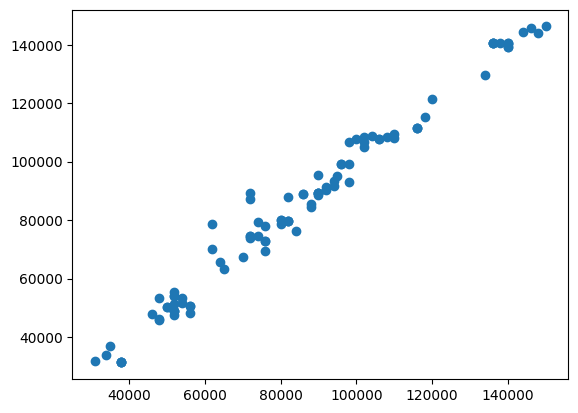

In [98]:
plt.scatter(y_test,y_pred_test)
plt.show()

Yaptıklarım sonucunda grafik üzerinde kontrol etmek istedim. Ve neredeyse %100 başarıya ulaştığımı görüyorum

In [102]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred_test)
r2score

0.9786228522905158

Başarı kriterleri arasında en anlamlı olan 'r2_Score' metriğini kullandım. %97lik başarı elde ettim.

In [104]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_GPA', 'Internships_Completed', 'Projects_Completed',
       'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship',
       'Field_of_Study_Arts', 'Field_of_Study_Business',
       'Field_of_Study_Computer Science', 'Field_of_Study_Education',
       'Field_of_Study_Engineering', 'Field_of_Study_Finance',
       'Field_of_Study_Law', 'Field_of_Study_Marketing',
       'Field_of_Study_Medicine', 'Field_of_Study_Nursing',
       'Field_of_Study_Psychology'],
      dtype='object')

In [106]:
newData = [[24,1,3.4,1300,3.78,3,2,11,6,2,3,0,0,0,1,0,0,0,0,0,0,0,0]]
newData = scaler.transform(newData)

C:\Users\YUSUF\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [108]:
reg.predict(newData)

array([161630.17392605])

Modelimi test etmek adına rastgele değerler içeren dataFrame oluşturdum.

In [114]:
data.corr(numeric_only = True)

,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,...,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Education,Field_of_Study_Engineering,Field_of_Study_Finance,Field_of_Study_Law,Field_of_Study_Marketing,Field_of_Study_Medicine,Field_of_Study_Nursing,Field_of_Study_Psychology
Age,1.000000e+00,-0.007071,0.185521,0.177444,0.175435,0.241667,0.204695,0.221561,0.175078,0.170544,...,-0.092026,-0.075485,0.040979,0.030124,8.832460e-19,0.090397,-0.022599,0.206452,-0.040979,-0.189931
Gender,-7.071068e-03,1.000000,-0.273020,-0.271090,-0.282293,-0.216846,-0.297378,-0.189183,-0.249503,-0.248782,...,-0.117130,-0.160128,-0.086929,0.113604,2.250176e-02,0.191761,-0.079900,0.061932,-0.086929,-0.094374
High_School_GPA,1.855206e-01,-0.273020,1.000000,0.982396,0.983206,0.949891,0.959775,0.936828,0.965463,0.966721,...,-0.067459,0.455431,-0.088412,0.101880,3.341429e-02,-0.105007,-0.019878,0.299350,-0.042103,-0.183069
SAT_Score,1.774442e-01,-0.271090,0.982396,1.000000,0.979050,0.942034,0.954198,0.935541,0.964108,0.964150,...,-0.090579,0.460078,-0.095379,0.108286,9.263315e-03,-0.130759,-0.028582,0.333149,-0.052233,-0.182047
University_GPA,1.754347e-01,-0.282293,0.983206,0.979050,1.000000,0.946397,0.960444,0.938113,0.970499,0.970358,...,-0.074208,0.470374,-0.093789,0.097653,1.538704e-02,-0.100980,-0.011320,0.296762,-0.032821,-0.199967
Internships_Completed,2.416667e-01,-0.216846,0.949891,0.942034,0.946397,1.000000,0.960207,0.973568,0.934650,0.935530,...,-0.092026,0.406182,-0.095617,0.133883,1.060743e-02,-0.037665,0.007533,0.312806,-0.040979,-0.222442
Projects_Completed,2.046952e-01,-0.297378,0.959775,0.954198,0.960444,0.960207,1.000000,0.944130,0.942652,0.942927,...,-0.010001,0.443416,-0.087008,0.113495,9.770805e-03,-0.085538,-0.022457,0.296982,-0.026003,-0.228969
Certifications,2.215611e-01,-0.189183,0.936828,0.935541,0.938113,0.973568,0.944130,1.000000,0.935140,0.935432,...,-0.117977,0.489115,-0.088509,0.076957,-2.217164e-03,-0.066132,-0.028342,0.349579,-0.042827,-0.225321
Soft_Skills_Score,1.750785e-01,-0.249503,0.965463,0.964108,0.970499,0.934650,0.942652,0.935140,1.000000,0.998557,...,-0.065141,0.466519,-0.061756,0.053633,5.785684e-03,-0.073228,-0.030618,0.346202,-0.039681,-0.211753
Networking_Score,1.705440e-01,-0.248782,0.966721,0.964150,0.970358,0.935530,0.942927,0.935432,0.998557,1.000000,...,-0.064953,0.465171,-0.061577,0.053478,2.286220e-02,-0.073017,-0.030530,0.345202,-0.039566,-0.211142


Daha sonra korelasyonu merak edip kontrol ettim.

In [138]:
data["Entrepreneurship"] = labelEncoder.fit_transform(data["Entrepreneurship"])

In [140]:
data["Entrepreneurship"].unique()

array([0])

"Enterpreneurship" kolonu tekil değer icerdiğinden modele alma gereği duymadım.

## "Career_Satisfaction" Regresyon Modeli

In [142]:
X = data[["Age","Gender","Starting_Salary","Years_to_Promotion","Current_Job_Level","Work_Life_Balance","Field_of_Study_Arts","Field_of_Study_Business","Field_of_Study_Computer Science","Field_of_Study_Education","Field_of_Study_Engineering","Field_of_Study_Finance","Field_of_Study_Law","Field_of_Study_Marketing","Field_of_Study_Medicine","Field_of_Study_Nursing","Field_of_Study_Psychology"]]
y = data["Career_Satisfaction"]
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 15)

In [144]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

"Kariyer memnuniyeti" için bir model daha oluşturuyorum.

In [146]:
reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [148]:
y_pred_test = reg.predict(X_test_scaled)

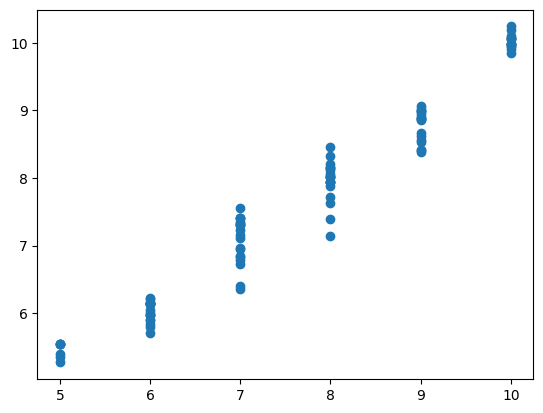

In [150]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [152]:
r2score = r2_score(y_test,y_pred_test)
r2score

0.9645952989745429

## Genel Çıkarım ve Özet

Bu veri setinde diğerlerinden farklı 2 regresyon modeli oluşturdum. Oluşturmadan önce One-Hot Encoder, Label Encoder ve Ordinal Encoder kullandım. Bunlar üzerinde pratik yapma imkanı elde ettim. İki modelimde de yaptıklarımın işe yaradığını görüyorum. Modellerim oldukça yüksek başarı oranına sahip çıktı.